# Machine Learning model with Keras and TensorFlow


#### Dataset used
    
    Iris flower (iris) dataset. 
    The dataset contains a set of 150 records under five attributes: 
    sepal length, sepal width, petal length, petal width, and class (known as target from sklearn datasets).

### 1. Sequential Model - most simple and most frequently used model
### 2. Functional API - for more complex models. In particular model with multiple inputs or outputs.

### Importing useful libraries

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()

## Exploring Data

### Preparing Pandas Datafame

In [2]:
# Load data into a DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
# Convert datatype to float
df = df.astype(float)
# append "target" and name it "label"
df['label'] = iris.target
# Use string label instead
df['label'] = df.label.replace(dict(enumerate(iris.target_names)))

In [3]:
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

    label  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa

## Preparing data for Keras and TensorFlow

Converting categorical feature to one-hot encoding. 

In [4]:
# label -> one-hot encoding
label = pd.get_dummies(df['label'])
label.columns = ['label_' + str(x) for x in label.columns]
df = pd.concat([df, label], axis=1)

# drop old label
df.drop(['label'], axis=1, inplace=True)

In [5]:
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   label_setosa  label_versicolor  label_virginica  
0             1                 0                0  
1             1                 0                0  
2             1                 0                0  
3             1                 0                0  
4             1                 0                0

    Creating X and y. 
    Keras and TensorFlow 2.0 take in Numpy array as inputs, converting DataFrame back to Numpy array.

In [6]:
# Creating X and y

X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
# Convert DataFrame into np array
X = np.asarray(X)

y = df[['label_setosa', 'label_versicolor', 'label_virginica']]
# Convert DataFrame into np array
y = np.asarray(y)

Finally, let’s split the dataset into a training set (75%)and a test set (25%) using train_test_split() from sklearn libra

In [7]:
# Split the data set in a training set (75%) and a test set (25%)
X_train, X_test, y_train, y_test = train_test_split(
  X,
  y,
  test_size=0.25
)

In [8]:
## X_train

## 1. Sequential model

1. Sequential model

        The Sequential model is a linear stack of layers. There are 2 ways to create a Sequential model

        Passing a list of layers to the constructor
        Simply add layers via the .add() method:


####  _______________Information about the input shape is mentioned in the first layer_______________

In [9]:
# Passing a list of layers to the constructor

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

modelA = Sequential([
    Dense(7, activation='relu', input_shape=(4,)),
    Dense(7, activation='relu'),
    Dense(3, activation='softmax'),
])

modelA.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 35        
                                                                 
 dense_1 (Dense)             (None, 7)                 56        
                                                                 
 dense_2 (Dense)             (None, 3)                 24        
                                                                 
Total params: 115
Trainable params: 115
Non-trainable params: 0
_________________________________________________________________


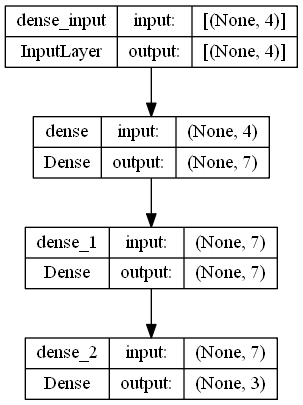

In [10]:
from tensorflow.keras.utils import plot_model
plot_model(modelA, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

#### And above is identical to the following via the .add() method

In [11]:
# Adding layer via add() method
modelB = Sequential()
modelB.add(Dense(7, activation='relu', input_shape=(4,)))
modelB.add(Dense(7, activation='relu'))
modelB.add(Dense(3, activation='softmax'))

modelB.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 7)                 35        
                                                                 
 dense_4 (Dense)             (None, 7)                 56        
                                                                 
 dense_5 (Dense)             (None, 3)                 24        
                                                                 
Total params: 115
Trainable params: 115
Non-trainable params: 0
_________________________________________________________________


### 1.1 Training a Sequential model

1.1 Training a Sequential model

For training a Sequential model, first configure the model using model.compile(). The main arguments here are optimizer, loss and metric:

    Optimizer - RMSProps (rmsprop) or adam
    loss function - categorical cross-entropy  (categorical_crossentropy) for multiple-class classification problem
    Evaluation metrics - accuracy to evaluate the model during training and testing.

In [12]:
modelB.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

#### Train the model - using model.fit() 

In [18]:
history = modelB.fit(X_train, y_train,
                    batch_size= 64,
                    epochs= 500,
                    validation_split=0.2
                   )

Epoch 1/500
2/2 [==============================] - 0s 136ms/step - loss: 0.8063 - accuracy: 0.6966 - val_loss: 0.7933 - val_accuracy: 0.8261
Epoch 2/500
2/2 [==============================] - 0s 51ms/step - loss: 0.8040 - accuracy: 0.7191 - val_loss: 0.7922 - val_accuracy: 0.8261
Epoch 3/500
2/2 [==============================] - 0s 86ms/step - loss: 0.8010 - accuracy: 0.7303 - val_loss: 0.7867 - val_accuracy: 0.8261
Epoch 4/500
2/2 [==============================] - 0s 76ms/step - loss: 0.7979 - accuracy: 0.7191 - val_loss: 0.7843 - val_accuracy: 0.8261
Epoch 5/500
2/2 [==============================] - 0s 59ms/step - loss: 0.7960 - accuracy: 0.7416 - val_loss: 0.7786 - val_accuracy: 0.7826
Epoch 6/500
2/2 [==============================] - 0s 93ms/step - loss: 0.7925 - accuracy: 0.6966 - val_loss: 0.7769 - val_accuracy: 0.7826
Epoch 7/500
2/2 [==============================] - 0s 79ms/step - loss: 0.7896 - accuracy: 0.7079 - val_loss: 0.7740 - val_accuracy: 0.7826
Epoch 8/500
2/2 [==

Epoch 59/500
2/2 [==============================] - 0s 91ms/step - loss: 0.6783 - accuracy: 0.7865 - val_loss: 0.6630 - val_accuracy: 0.8261
Epoch 60/500
2/2 [==============================] - 0s 83ms/step - loss: 0.6778 - accuracy: 0.7978 - val_loss: 0.6590 - val_accuracy: 0.8261
Epoch 61/500
2/2 [==============================] - 0s 78ms/step - loss: 0.6756 - accuracy: 0.7528 - val_loss: 0.6587 - val_accuracy: 0.8261
Epoch 62/500
2/2 [==============================] - 0s 62ms/step - loss: 0.6737 - accuracy: 0.7640 - val_loss: 0.6567 - val_accuracy: 0.8261
Epoch 63/500
2/2 [==============================] - 0s 65ms/step - loss: 0.6721 - accuracy: 0.7640 - val_loss: 0.6544 - val_accuracy: 0.8261
Epoch 64/500
2/2 [==============================] - 0s 76ms/step - loss: 0.6703 - accuracy: 0.7528 - val_loss: 0.6543 - val_accuracy: 0.8261
Epoch 65/500
2/2 [==============================] - 0s 80ms/step - loss: 0.6678 - accuracy: 0.7865 - val_loss: 0.6524 - val_accuracy: 0.8696
Epoch 66/500


Epoch 117/500
2/2 [==============================] - 0s 118ms/step - loss: 0.5776 - accuracy: 0.8876 - val_loss: 0.5615 - val_accuracy: 1.0000
Epoch 118/500
2/2 [==============================] - 0s 109ms/step - loss: 0.5758 - accuracy: 0.9326 - val_loss: 0.5541 - val_accuracy: 1.0000
Epoch 119/500
2/2 [==============================] - 0s 111ms/step - loss: 0.5733 - accuracy: 0.8989 - val_loss: 0.5516 - val_accuracy: 0.9565
Epoch 120/500
2/2 [==============================] - 0s 80ms/step - loss: 0.5721 - accuracy: 0.8652 - val_loss: 0.5516 - val_accuracy: 1.0000
Epoch 121/500
2/2 [==============================] - 0s 72ms/step - loss: 0.5724 - accuracy: 0.9326 - val_loss: 0.5479 - val_accuracy: 0.9565
Epoch 122/500
2/2 [==============================] - 0s 72ms/step - loss: 0.5702 - accuracy: 0.8652 - val_loss: 0.5487 - val_accuracy: 1.0000
Epoch 123/500
2/2 [==============================] - 0s 67ms/step - loss: 0.5674 - accuracy: 0.9326 - val_loss: 0.5464 - val_accuracy: 1.0000
Epo

2/2 [==============================] - 0s 75ms/step - loss: 0.4979 - accuracy: 0.9551 - val_loss: 0.4753 - val_accuracy: 1.0000
Epoch 175/500
2/2 [==============================] - 0s 66ms/step - loss: 0.4966 - accuracy: 0.9438 - val_loss: 0.4749 - val_accuracy: 1.0000
Epoch 176/500
2/2 [==============================] - 0s 61ms/step - loss: 0.4953 - accuracy: 0.9551 - val_loss: 0.4694 - val_accuracy: 1.0000
Epoch 177/500
2/2 [==============================] - 0s 109ms/step - loss: 0.4941 - accuracy: 0.9438 - val_loss: 0.4674 - val_accuracy: 1.0000
Epoch 178/500
2/2 [==============================] - 0s 106ms/step - loss: 0.4926 - accuracy: 0.9438 - val_loss: 0.4671 - val_accuracy: 1.0000
Epoch 179/500
2/2 [==============================] - 0s 88ms/step - loss: 0.4908 - accuracy: 0.9438 - val_loss: 0.4651 - val_accuracy: 1.0000
Epoch 180/500
2/2 [==============================] - 0s 147ms/step - loss: 0.4894 - accuracy: 0.9438 - val_loss: 0.4650 - val_accuracy: 1.0000
Epoch 181/500
2/2

2/2 [==============================] - 0s 72ms/step - loss: 0.4247 - accuracy: 0.9551 - val_loss: 0.3944 - val_accuracy: 1.0000
Epoch 232/500
2/2 [==============================] - 0s 79ms/step - loss: 0.4233 - accuracy: 0.9551 - val_loss: 0.3941 - val_accuracy: 1.0000
Epoch 233/500
2/2 [==============================] - 0s 71ms/step - loss: 0.4220 - accuracy: 0.9663 - val_loss: 0.3941 - val_accuracy: 1.0000
Epoch 234/500
2/2 [==============================] - 0s 61ms/step - loss: 0.4209 - accuracy: 0.9663 - val_loss: 0.3953 - val_accuracy: 1.0000
Epoch 235/500
2/2 [==============================] - 0s 68ms/step - loss: 0.4202 - accuracy: 0.9551 - val_loss: 0.3928 - val_accuracy: 1.0000
Epoch 236/500
2/2 [==============================] - 0s 68ms/step - loss: 0.4183 - accuracy: 0.9663 - val_loss: 0.3882 - val_accuracy: 1.0000
Epoch 237/500
2/2 [==============================] - 0s 60ms/step - loss: 0.4189 - accuracy: 0.9663 - val_loss: 0.3841 - val_accuracy: 1.0000
Epoch 238/500
2/2 [=

2/2 [==============================] - 0s 101ms/step - loss: 0.3652 - accuracy: 0.9551 - val_loss: 0.3265 - val_accuracy: 1.0000
Epoch 289/500
2/2 [==============================] - 0s 203ms/step - loss: 0.3647 - accuracy: 0.9663 - val_loss: 0.3258 - val_accuracy: 1.0000
Epoch 290/500
2/2 [==============================] - 0s 194ms/step - loss: 0.3631 - accuracy: 0.9663 - val_loss: 0.3251 - val_accuracy: 1.0000
Epoch 291/500
2/2 [==============================] - 0s 150ms/step - loss: 0.3613 - accuracy: 0.9663 - val_loss: 0.3274 - val_accuracy: 1.0000
Epoch 292/500
2/2 [==============================] - 0s 78ms/step - loss: 0.3611 - accuracy: 0.9551 - val_loss: 0.3220 - val_accuracy: 1.0000
Epoch 293/500
2/2 [==============================] - 0s 70ms/step - loss: 0.3599 - accuracy: 0.9663 - val_loss: 0.3257 - val_accuracy: 1.0000
Epoch 294/500
2/2 [==============================] - 0s 69ms/step - loss: 0.3582 - accuracy: 0.9551 - val_loss: 0.3221 - val_accuracy: 1.0000
Epoch 295/500
2/

Epoch 346/500
2/2 [==============================] - 0s 60ms/step - loss: 0.3164 - accuracy: 0.9551 - val_loss: 0.2698 - val_accuracy: 1.0000
Epoch 347/500
2/2 [==============================] - 0s 68ms/step - loss: 0.3144 - accuracy: 0.9663 - val_loss: 0.2709 - val_accuracy: 1.0000
Epoch 348/500
2/2 [==============================] - 0s 57ms/step - loss: 0.3119 - accuracy: 0.9663 - val_loss: 0.2743 - val_accuracy: 1.0000
Epoch 349/500
2/2 [==============================] - 0s 63ms/step - loss: 0.3114 - accuracy: 0.9551 - val_loss: 0.2775 - val_accuracy: 1.0000
Epoch 350/500
2/2 [==============================] - 0s 62ms/step - loss: 0.3110 - accuracy: 0.9551 - val_loss: 0.2691 - val_accuracy: 1.0000
Epoch 351/500
2/2 [==============================] - 0s 54ms/step - loss: 0.3095 - accuracy: 0.9663 - val_loss: 0.2734 - val_accuracy: 1.0000
Epoch 352/500
2/2 [==============================] - 0s 58ms/step - loss: 0.3084 - accuracy: 0.9551 - val_loss: 0.2692 - val_accuracy: 1.0000
Epoch 

Epoch 404/500
2/2 [==============================] - 0s 59ms/step - loss: 0.2735 - accuracy: 0.9663 - val_loss: 0.2303 - val_accuracy: 1.0000
Epoch 405/500
2/2 [==============================] - 0s 54ms/step - loss: 0.2690 - accuracy: 0.9551 - val_loss: 0.2297 - val_accuracy: 1.0000
Epoch 406/500
2/2 [==============================] - 0s 64ms/step - loss: 0.2693 - accuracy: 0.9551 - val_loss: 0.2325 - val_accuracy: 1.0000
Epoch 407/500
2/2 [==============================] - 0s 51ms/step - loss: 0.2689 - accuracy: 0.9438 - val_loss: 0.2318 - val_accuracy: 1.0000
Epoch 408/500
2/2 [==============================] - 0s 57ms/step - loss: 0.2686 - accuracy: 0.9438 - val_loss: 0.2315 - val_accuracy: 1.0000
Epoch 409/500
2/2 [==============================] - 0s 56ms/step - loss: 0.2673 - accuracy: 0.9551 - val_loss: 0.2280 - val_accuracy: 1.0000
Epoch 410/500
2/2 [==============================] - 0s 58ms/step - loss: 0.2662 - accuracy: 0.9551 - val_loss: 0.2269 - val_accuracy: 1.0000
Epoch 

Epoch 462/500
2/2 [==============================] - 0s 60ms/step - loss: 0.2356 - accuracy: 0.9551 - val_loss: 0.1925 - val_accuracy: 1.0000
Epoch 463/500
2/2 [==============================] - 0s 58ms/step - loss: 0.2351 - accuracy: 0.9663 - val_loss: 0.1865 - val_accuracy: 1.0000
Epoch 464/500
2/2 [==============================] - 0s 52ms/step - loss: 0.2345 - accuracy: 0.9551 - val_loss: 0.1880 - val_accuracy: 1.0000
Epoch 465/500
2/2 [==============================] - 0s 48ms/step - loss: 0.2370 - accuracy: 0.9551 - val_loss: 0.1974 - val_accuracy: 1.0000
Epoch 466/500
2/2 [==============================] - 0s 65ms/step - loss: 0.2345 - accuracy: 0.9551 - val_loss: 0.1883 - val_accuracy: 1.0000
Epoch 467/500
2/2 [==============================] - 0s 53ms/step - loss: 0.2332 - accuracy: 0.9551 - val_loss: 0.1921 - val_accuracy: 1.0000
Epoch 468/500
2/2 [==============================] - 0s 54ms/step - loss: 0.2336 - accuracy: 0.9663 - val_loss: 0.1935 - val_accuracy: 1.0000
Epoch 

### 1.2 Model Evaluation

In [20]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg' ###SVG stands for Scalable Vector Graphics 
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro-')
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

1.2 Model Evaluation

The Model can be evaluated graphically by doing the following:

    Plotting the progress on loss and accuracy metrics
    Testing the model against data that has never been used for training (testing data) 

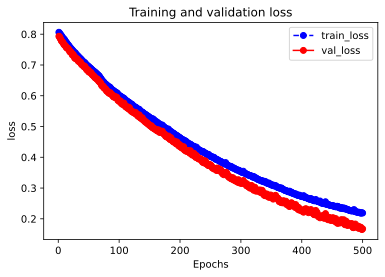

In [21]:
plot_metric(history, 'loss')

By running plot_metric(history, 'accuracy') to plot the progress on accuracy.

In [22]:
plot_metric(history, 'accuracy')

To test our model against test dataset

In [23]:
modelB.evaluate(x = X_test,y = y_test)

2/2 [==============================] - 0s 5ms/step - loss: 0.2063 - accuracy: 0.9474


[0.20631320774555206, 0.9473684430122375]

## 2. Functional API

2. Functional API

    + The Keras functional API provides a more flexible way of defining models. 
    + In particular, it allows us to define multiple input or output models as well as models that share layers.

**Creating the same neural network using Functional API**

In [24]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense


# This returns a tensor
inputs = Input(shape=(4,))

# a layer instance is callable on a tensor, and returns a tensor
x = Dense(5, activation='relu')(inputs)       #### first hidden layer
x = Dense(10, activation='relu')(x)           #### second hidden layer
outputs = Dense(3, activation='softmax')(x)   #### output layer

# This creates a model that includes
# the Input neurons and three Dense layers
model_fun_api = Model(inputs=inputs, outputs=outputs)

model_fun_api.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_6 (Dense)             (None, 5)                 25        
                                                                 
 dense_7 (Dense)             (None, 10)                60        
                                                                 
 dense_8 (Dense)             (None, 3)                 33        
                                                                 
Total params: 118
Trainable params: 118
Non-trainable params: 0
_________________________________________________________________


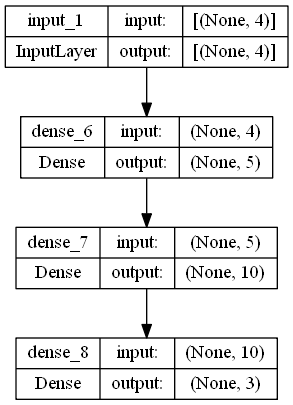

In [25]:
from tensorflow.keras.utils import plot_model
plot_model(model_fun_api, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In Functional API:

    Every layer instance is a callable on a tensor, and it returns a tensor
    Input() is used to define the input layer with input shape as an argumentshape=(4,)
    Only things we need to reference in Model() are the inputs and outputs tensors

## 2.1 Training a Functional API model

#### A Functional API model is trained just like Sequential model.

### 2.1 Training a Function API model
Such model can be trained just like Keras Sequential model

In [26]:
# First configure model using model.compile()
model_fun_api.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
# Then, train the model with fit()
history = model_fun_api.fit(X_train, y_train,
                    batch_size= 64,
                    epochs= 100,
                    validation_split=0.2
                   )

Epoch 1/100
2/2 [==============================] - 2s 288ms/step - loss: 1.5854 - accuracy: 0.3596 - val_loss: 1.4731 - val_accuracy: 0.3478
Epoch 2/100
2/2 [==============================] - 0s 77ms/step - loss: 1.4924 - accuracy: 0.3596 - val_loss: 1.4149 - val_accuracy: 0.3478
Epoch 3/100
2/2 [==============================] - 0s 76ms/step - loss: 1.4351 - accuracy: 0.3596 - val_loss: 1.3697 - val_accuracy: 0.3478
Epoch 4/100
2/2 [==============================] - 0s 56ms/step - loss: 1.3905 - accuracy: 0.3596 - val_loss: 1.3340 - val_accuracy: 0.3478
Epoch 5/100
2/2 [==============================] - 0s 82ms/step - loss: 1.3543 - accuracy: 0.3596 - val_loss: 1.3024 - val_accuracy: 0.3478
Epoch 6/100
2/2 [==============================] - 0s 74ms/step - loss: 1.3217 - accuracy: 0.3596 - val_loss: 1.2748 - val_accuracy: 0.3478
Epoch 7/100
2/2 [==============================] - 0s 76ms/step - loss: 1.2937 - accuracy: 0.3596 - val_loss: 1.2499 - val_accuracy: 0.3478
Epoch 8/100
2/2 [==

2/2 [==============================] - 0s 76ms/step - loss: 0.6704 - accuracy: 0.6854 - val_loss: 0.6338 - val_accuracy: 0.7391
Epoch 60/100
2/2 [==============================] - 0s 60ms/step - loss: 0.6645 - accuracy: 0.6854 - val_loss: 0.6268 - val_accuracy: 0.7391
Epoch 61/100
2/2 [==============================] - 0s 68ms/step - loss: 0.6581 - accuracy: 0.6854 - val_loss: 0.6202 - val_accuracy: 0.7391
Epoch 62/100
2/2 [==============================] - 0s 43ms/step - loss: 0.6520 - accuracy: 0.6854 - val_loss: 0.6156 - val_accuracy: 0.7391
Epoch 63/100
2/2 [==============================] - 0s 55ms/step - loss: 0.6455 - accuracy: 0.6854 - val_loss: 0.6092 - val_accuracy: 0.7391
Epoch 64/100
2/2 [==============================] - 0s 50ms/step - loss: 0.6393 - accuracy: 0.6854 - val_loss: 0.6033 - val_accuracy: 0.7391
Epoch 65/100
2/2 [==============================] - 0s 61ms/step - loss: 0.6341 - accuracy: 0.6854 - val_loss: 0.5955 - val_accuracy: 0.7391
Epoch 66/100
2/2 [========

### 2.2 Model Evaludation

2.2 Model Evaluation

This model can be evaluated just like we did in Sequential model

By running plot_metric(history, 'loss') to plot the progress on loss.

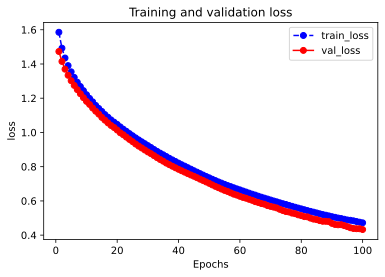

In [27]:
plot_metric(history, 'loss')

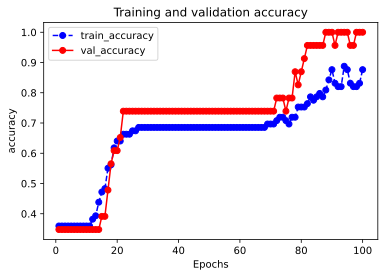

In [28]:
plot_metric(history, 'accuracy')

In [29]:
model_fun_api.evaluate(x = X_test,y = y_test)

2/2 [==============================] - 0s 2ms/step - loss: 0.4965 - accuracy: 0.8684


[0.4964558482170105, 0.8684210777282715]

### 2.3 Multi-input and multi-output model

    Models with multiple inputs or multiple outputs are good use cases for the Functional API. Consider the following scenarios:

    A model with 2 inputs and 1 output
    A model with 1 input and 2 outputs
    A model with 2 input and 2 outputs

For a model with 2 inputs and 1 output. Suppose we have image data and structured data for iris flower classification. A Machine Learning model can be built as:

### First scenario - 2 inputs and 1 output

##### When there are 2 different inputs:
    
    we concatenate them using concatenate([x_1, x_2]). 
    To define a model with multiple inputs, we just need to specify a list of inputs, where inputs=[input_structure, input_image].

In [31]:
from tensorflow.keras.layers import concatenate

# 2 inputs, one structured data, the other image data
input_structure = Input(shape=(4,), name='input_structure')       ####Tabular data input
input_image = Input(shape=(256,), name='input_image')             #### Image data input 

# middle layers
x_1 = Dense(10, activation='relu')(input_structure)
x_2 = Dense(100, activation='relu')(input_image)

## Concatanation
c = concatenate([x_1, x_2])
## define the output
outputs = Dense(3, activation='sigmoid', name='outputs')(c)

model = Model(inputs=[input_structure, input_image], outputs=outputs)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_structure (InputLayer)   [(None, 4)]          0           []                               
                                                                                                  
 input_image (InputLayer)       [(None, 256)]        0           []                               
                                                                                                  
 dense_9 (Dense)                (None, 10)           50          ['input_structure[0][0]']        
                                                                                                  
 dense_10 (Dense)               (None, 100)          25700       ['input_image[0][0]']            
                                                                                            

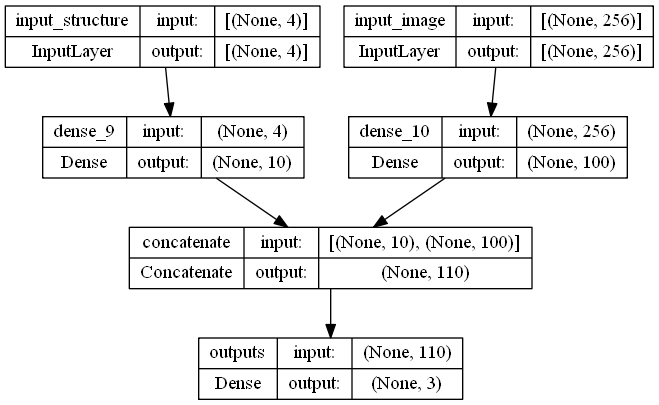

In [32]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

#### For the scenario with 1 input and 2 outputs

For a model with 1 input and 2 outputs. Suppose we only have image data and the task is to identify whether the given image is a flower and if yes, what type of iris flower it is?

In [33]:
## 1 inputs, 2 output

from tensorflow.keras.layers import concatenate

# only one input
input_image = Input(shape=(256,), name='input_image')

# middle layer
x = Dense(300, activation='relu')(input_image)

# output layer
output_1 = Dense(1, activation='sigmoid', name='output_1')(x)
output_2 = Dense(3, activation='softmax', name='output_2')(x)

model = Model(inputs=input_image, outputs=[output_1, output_2])

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_image (InputLayer)       [(None, 256)]        0           []                               
                                                                                                  
 dense_11 (Dense)               (None, 300)          77100       ['input_image[0][0]']            
                                                                                                  
 output_1 (Dense)               (None, 1)            301         ['dense_11[0][0]']               
                                                                                                  
 output_2 (Dense)               (None, 3)            903         ['dense_11[0][0]']               
                                                                                            

In [34]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

#### For the scenario with 2 inputs and 2 outputs

In [35]:
## 2 inputs, 2 outputs
from tensorflow.keras.layers import concatenate

# 2 inputs, one structured data, the other image data
input_structured = Input(shape=(4,), name='input_structured')
input_image = Input(shape=(256,), name='input_image')

# middle layers
x_1 = Dense(10, activation='relu')(input_structured)
x_2 = Dense(300, activation='relu')(input_image)

c = concatenate([x_1, x_2])

# output layser
output_1 = Dense(1, activation='sigmoid', name='output_1')(c)
output_2 = Dense(3, activation='softmax', name='output_2')(c)

model = Model(inputs=[input_structured, input_image], outputs=[output_1, output_2])

model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_structured (InputLayer)  [(None, 4)]          0           []                               
                                                                                                  
 input_image (InputLayer)       [(None, 256)]        0           []                               
                                                                                                  
 dense_12 (Dense)               (None, 10)           50          ['input_structured[0][0]']       
                                                                                                  
 dense_13 (Dense)               (None, 300)          77100       ['input_image[0][0]']            
                                                                                            

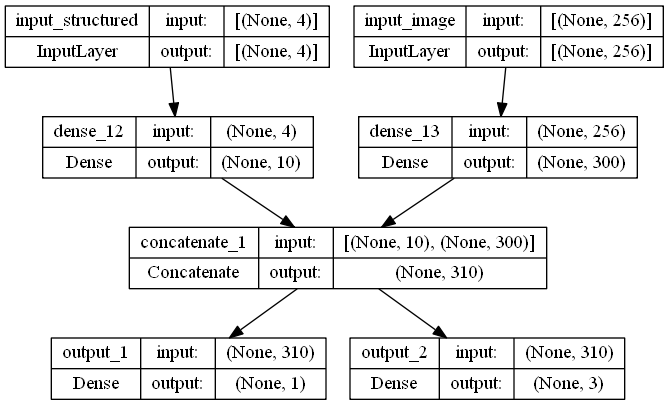

In [36]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)